In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
import pydub
import librosa

from scipy import signal

C:\Users\ghage\Downloads\beat_detection_samples\bensound-erf.mp3


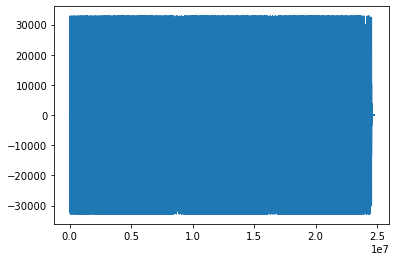

In [2]:
sample_dir = 'C:\\Users\\ghage\\Downloads\\beat_detection_samples\\'
sample_song = 'bensound-erf.mp3'
print(sample_dir+sample_song)

song = pydub.AudioSegment.from_mp3(sample_dir + sample_song)

fs = song.frame_rate * song.sample_width
fs

raw = np.array(song.get_array_of_samples())
plt.plot(raw)

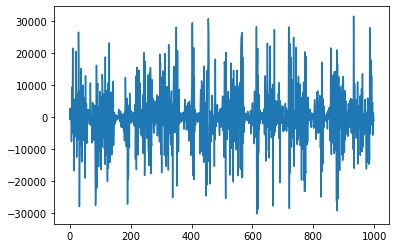

In [3]:
x = raw[1000000:2000000:1000]
plt.plot(x)
fsx = fs/100

In [19]:
raw_small = raw[::]
raw_small.shape

(24749168,)

In [68]:
y = np.array([raw_small[1000000 + 20000*(i):1000000 + 20000*(i+1)] for i in range(20)])
y.shape

(20, 20000)

In [116]:
ry = y@y.transpose() / 20000
ry.shape

(20, 20)

In [117]:
w_unsorted, v = np.linalg.eig(ry)

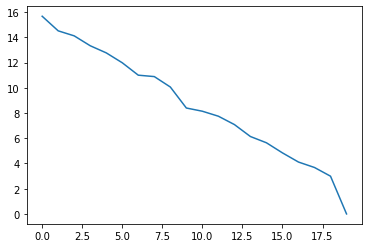

In [127]:
plt.plot(-np.sort(-w_unsorted) - np.min(w_unsorted))

In [185]:
def mdl(k, eigs, M, N):
#     f = np.prod(eigs[k+1:])**(1/(M-k)) * np.sum(eigs[k+1:]) / (M-k)
    f = np.prod(eigs[k+1:])**(1/(M-k)) / (np.sum(eigs[k+1:])/(M - k))
    
    return -N*(M - k)*np.log(f) + 0.5*k*(2*M - k)*np.log(N)

In [212]:
M = 200
N = 100000

y = np.array([raw_small[1000000 + N*(i):1000000 + N*(i+1) - 7*N//8] for i in range(M)])
ry = y@y.transpose() / N
w_unsorted, _ = np.linalg.eig(ry)
w = -np.sort(-w_unsorted)
# w = w_unsorted
w = w - np.min(w) +1



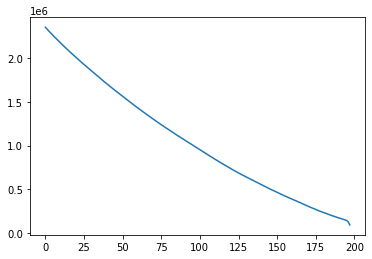

In [214]:
plt.plot([mdl(i, w, M, N) for i in range(1, M-1)])

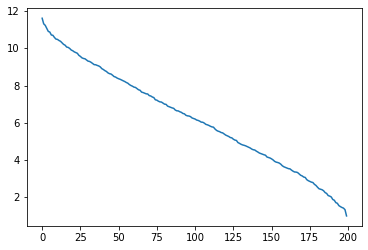

In [213]:
plt.plot(w)

In [218]:
u, s, vh = np.linalg.svd(ry)

In [237]:
yn = y - np.mean(y)
ryn = yn @ yn.transpose() / N

(200, 200)

In [239]:
cyy = (np.diag(np.diag(ryn))**(-0.5))@ryn@(np.diag(np.diag(ryn))**(-0.5))
cyy.shape

<ipython-input-239-70c9e365f65b>:1: RuntimeWarning: divide by zero encountered in power
  cyy = (np.diag(np.diag(ryn))**(-0.5))@ryn@(np.diag(np.diag(ryn))**(-0.5))
<ipython-input-239-70c9e365f65b>:1: RuntimeWarning: invalid value encountered in matmul
  cyy = (np.diag(np.diag(ryn))**(-0.5))@ryn@(np.diag(np.diag(ryn))**(-0.5))


(200, 200)

C:\Users\ghage\anaconda3\lib\site-packages\matplotlib\image.py:452: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
C:\Users\ghage\anaconda3\lib\site-packages\matplotlib\image.py:459: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
C:\Users\ghage\anaconda3\lib\site-packages\matplotlib\image.py:464: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
<__array_function__ internals>:5: UserWarning: Warning: converting a masked element to nan.
C:\Users\ghage\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


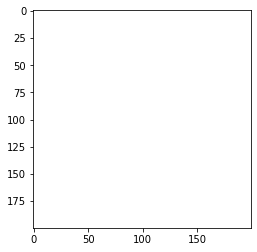

In [240]:
plt.imshow(cyy)